In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load npz file
data = np.load('dataset/qm9_1000_rff.npz')
keys = list(data.keys())

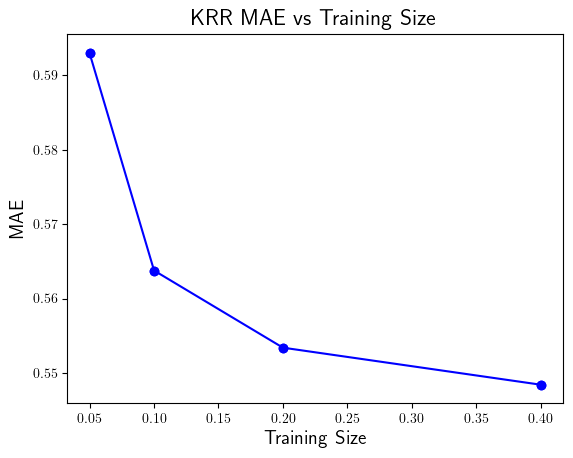

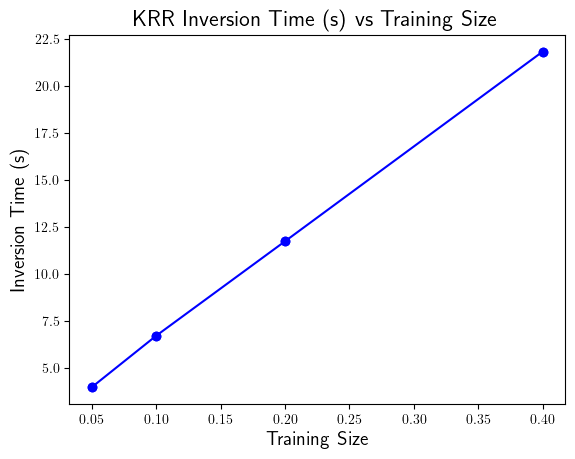

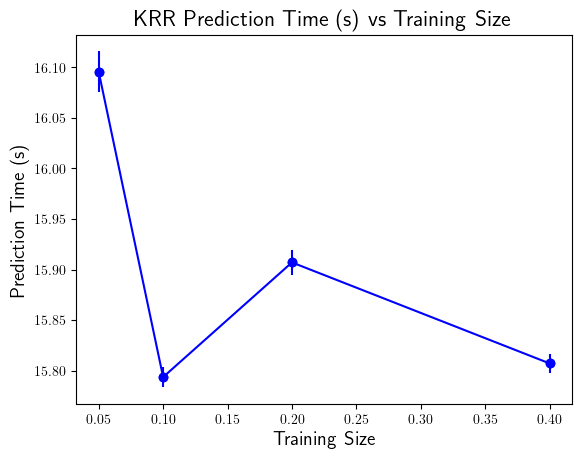

In [5]:
plt.rc('text', usetex=True)
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE', 'inversion_time': 'Inversion Time (s)', 'prediction_time': 'Prediction Time (s)'}
for key in keys:
    summed = np.sum(data[key], axis=0)
    stddev = np.std(data[key], axis=0, ddof=0)
    # Set x axis values from x_axis
    # plt.xticks(np.arange(summed.shape[0]), x_axis)
    plt.plot(x_axis, summed, marker='o', color='b')
    plt.errorbar(x_axis, summed, yerr=stddev, color='b', fmt='o')
    plt.ylabel(y_label_dict[key], fontsize=14)
    plt.xlabel('Training Size', fontsize=14)
    plt.title('KRR ' + y_label_dict[key] + ' vs Training Size', fontsize=16)
    plt.savefig('KRR_QM9_training_size_vs_' + key + '.pdf')
    plt.show()

In [7]:
richard_data = np.load('time_diff/RFF_n500.npz')
richard_data_keys = list(richard_data.keys())

In [9]:
richard_data['maes']

array([[0.03477192, 0.03358585, 0.03318658, 0.03344898],
       [0.03459541, 0.03382313, 0.03280733, 0.03278171],
       [0.03434451, 0.03316376, 0.03282085, 0.0329783 ],
       [0.03365124, 0.03245134, 0.0331276 , 0.0337051 ],
       [0.03535749, 0.03463263, 0.03327325, 0.03272247],
       [0.03514838, 0.0340119 , 0.03315477, 0.03359351],
       [0.03418072, 0.03312089, 0.03352515, 0.03345099],
       [0.03405552, 0.03349964, 0.03368602, 0.03336908],
       [0.03388571, 0.03338264, 0.0330521 , 0.03284013],
       [0.03513158, 0.0339337 , 0.03314128, 0.03257848]], dtype=float32)

In [ ]:
plt.rc('text', usetex=True)
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE', 'inversion_time': 'Inversion Time (s)', 'prediction_time': 'Prediction Time (s)'}
for key in richard_data_keys:
    summed = np.sum(richard_data[key], axis=0)
    stddev = np.std(richard_data[key], axis=0, ddof=0)
    # Set x axis values from x_axis
    # plt.xticks(np.arange(summed.shape[0]), x_axis)
    plt.plot(x_axis, summed, marker='o', color='b')
    plt.errorbar(x_axis, summed, yerr=stddev, color='b', fmt='o')
    plt.ylabel(y_label_dict[key], fontsize=14)
    plt.xlabel('Training Size', fontsize=14)
    plt.title('RFF ' + y_label_dict[key] + ' vs Training Size for 500 features', fontsize=16)
    plt.savefig('RFF_500_QM9_training_size_vs_' + key + '.pdf')
    plt.show()